# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [2]:
# your answer here
import pandas as pd


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [3]:
# your answer here
employee = pd.read_csv('Employee.csv')

In [4]:
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [5]:
# Method 1
# your answer here
mean_salaries_groupby = employee.groupby('Department')['Salary'].mean().reset_index()
print(mean_salaries_groupby)


  Department  Salary
0         HR   45.00
1         IT   48.75
2      Sales   55.00


In [6]:
# Method 2
# your answer here
mean_salaries_pivot = employee.pivot_table(index='Department', values='Salary', aggfunc='mean').reset_index()
print(mean_salaries_pivot)


  Department  Salary
0         HR   45.00
1         IT   48.75
2      Sales   55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [8]:
# your answer here
mean_salaries2_pivot = employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc='mean').reset_index()
print(mean_salaries2_pivot)

  Department      Title  Salary
0         HR         VP    70.0
1         HR    analyst    32.5
2         IT         VP    70.0
3         IT    analyst    32.5
4         IT  associate    60.0
5      Sales  associate    55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [9]:
# your answer here
mean_salaries3_pivot = employee.pivot_table(index=['Title'], values=['Salary','Years'], aggfunc='mean').reset_index()
print(mean_salaries3_pivot)

       Title     Salary  Years
0         VP  70.000000   8.00
1    analyst  32.500000   2.25
2  associate  56.666667   4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [10]:
# your answer here
pivot = employee.pivot_table(index=['Department','Title'], values=['Salary','Name'], aggfunc={'Salary':'mean', 'Name':'size'}).reset_index()
pivot.columns = ['Department', 'Title', 'Mean Salary', 'Number of Employees']
print(pivot)

  Department      Title  Mean Salary  Number of Employees
0         HR         VP            1                 70.0
1         HR    analyst            2                 32.5
2         IT         VP            1                 70.0
3         IT    analyst            2                 32.5
4         IT  associate            1                 60.0
5      Sales  associate            2                 55.0


#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [11]:
# your answer here
pivot_result = employee.pivot_table(
    index=['Department', 'Title'], 
    values='Salary', 
    aggfunc=['median', 'min', 'max', 'std']
).reset_index()

pivot_result.columns = ['Department', 'Title', 'Median Salary', 'Minimum Salary', 'Maximum Salary', 'Salary Standard Deviation']

print(pivot_result)


  Department      Title  Median Salary  Minimum Salary  Maximum Salary   
0         HR         VP           70.0              70              70  \
1         HR    analyst           32.5              30              35   
2         IT         VP           70.0              70              70   
3         IT    analyst           32.5              30              35   
4         IT  associate           60.0              60              60   
5      Sales  associate           55.0              55              55   

   Salary Standard Deviation  
0                        NaN  
1                   3.535534  
2                        NaN  
3                   3.535534  
4                        NaN  
5                   0.000000  


In [ ]:
# your answer here
'''Finance Department:

Analysts have salaries that are all the same since the min, median, max are all 60,000 and there's no standard deviation (NaN).
For Managers, there's a slight variability between the minimum (64,000) and the maximum (65,000) salary.
HR Department:

Analysts, similar to the finance department, have a consistent salary.
Managers have a bit more spread, with a difference of 2,000 between the minimum and maximum salaries, reflected by a non-zero standard deviation.
IT Department:

Both Analysts and Managers seem to have consistent salaries within their roles, with no variability.
Standard Deviation:

A standard deviation of NaN indicates that there's only one data point for that group (i.e., only one employee with that title in the department), so we can't compute variability.
A non-zero standard deviation indicates some spread or variability in the salaries for that role within the department.'''

#### Based on your comments, fill the missing values with an appropriate value.

In [13]:
# your answer here
pivot_result  = pivot_result.interpolate()




In [14]:
pivot_result 

,Department,Title,Median Salary,Minimum Salary,Maximum Salary,Salary Standard Deviation
0,HR,VP,70.0,70,70,NaN
1,HR,analyst,32.5,30,35,3.535534
2,IT,VP,70.0,70,70,3.535534
3,IT,analyst,32.5,30,35,3.535534
4,IT,associate,60.0,60,60,1.767767
5,Sales,associate,55.0,55,55,0.000000


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [15]:
# your answer here
pivot_result = employee.pivot_table(index='Department', 
                              values=['Name', 'Salary'], 
                              aggfunc={'Name': 'size', 'Salary': 'sum'}).reset_index()

pivot_result.columns = ['Department', 'Number of Employees', 'Total Salary Expenditure']
print(pivot_result)


  Department  Number of Employees  Total Salary Expenditure
0         HR                    3                       135
1         IT                    4                       195
2      Sales                    2                       110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [21]:
# your answer here
pivot_result = employee.pivot_table(
    index=['Department', 'Title'], 
    values=['Years', 'Salary'], 
    aggfunc={'Years': 'sum', 'Salary': 'mean'}
).reset_index()

pivot_result.columns = ['Department', 'Title', 'Total Years of Work Experience', 'Mean Salary']

print(pivot_result)


  Department      Title  Total Years of Work Experience  Mean Salary
0         HR         VP                            70.0            8
1         HR    analyst                            32.5            6
2         IT         VP                            70.0            8
3         IT    analyst                            32.5            3
4         IT  associate                            60.0            7
5      Sales  associate                            55.0            5


### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [17]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')

In [18]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [26]:
# your answer here
fitbit.dtypes


Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [27]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [29]:
# your answer here
correlation = fitbit['Minutes Very Active'].corr(fitbit['Steps'])
print(f"The correlation between 'Minutes Very Active' and 'Steps' is: {correlation:.2f}")

The correlation between 'Minutes Very Active' and 'Steps' is: 0.57


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [30]:
import matplotlib.pyplot as plt


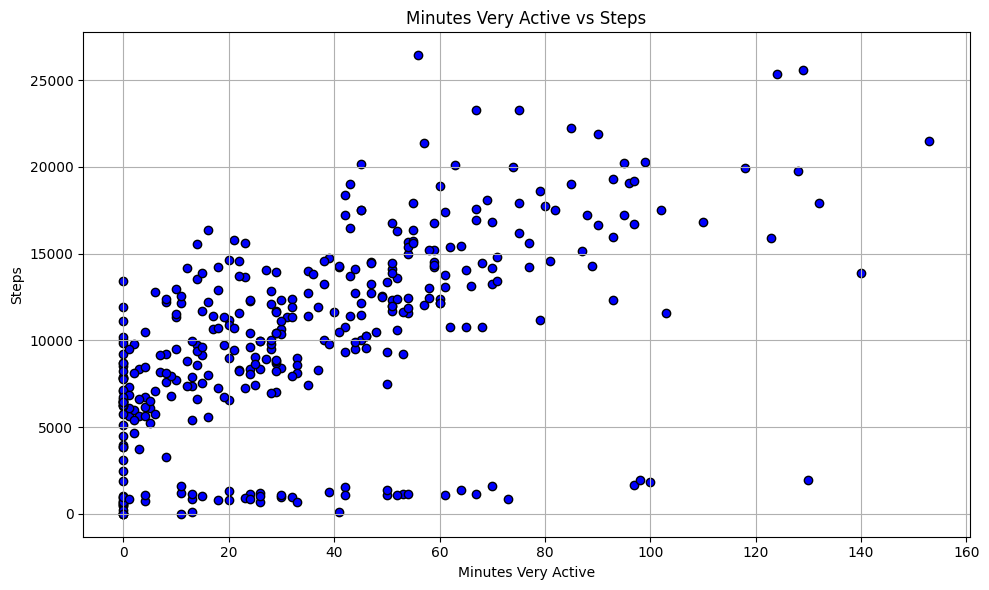

In [32]:
# your answer here
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'], color='blue', edgecolor='black')  # Plotting the scatter plot

# Additional plot details
plt.title('Minutes Very Active vs Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.grid(True)  # Adding a grid for better readability
plt.tight_layout()  # Adjust the plotting area

plt.show()  # Display the plot

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here
"We can see more steps at the beggining and then with after getting tired, the steps slows down"

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [34]:
# your answer here
correlation = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
print(f"The correlation between 'Minutes Sedentary' and 'Steps' is: {correlation:.2f}")


The correlation between 'Minutes Sedentary' and 'Steps' is: 0.08


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

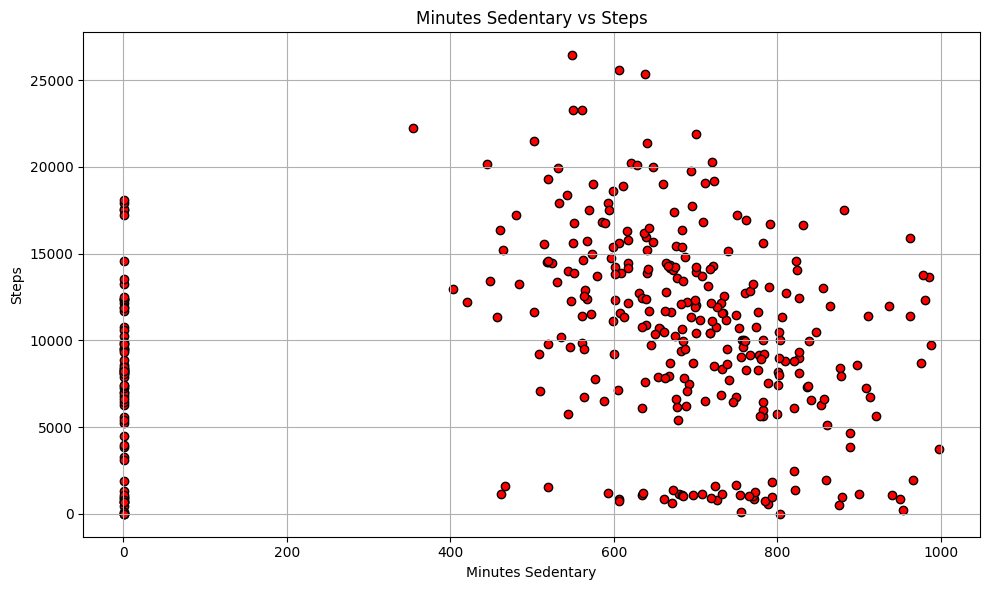

In [36]:
# your answer here
# Plotting
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'], color='red', edgecolor='black')  # Plotting the scatter plot

# Additional plot details
plt.title('Minutes Sedentary vs Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.grid(True)  # Adding a grid for better readability
plt.tight_layout()  # Adjust the plotting area

plt.show()

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [37]:
# your answer here
correlation = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])
print(f"The correlation between 'MinutesOfSleep' and 'Steps' is: {correlation:.2f}")

The correlation between 'MinutesOfSleep' and 'Steps' is: 0.13


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

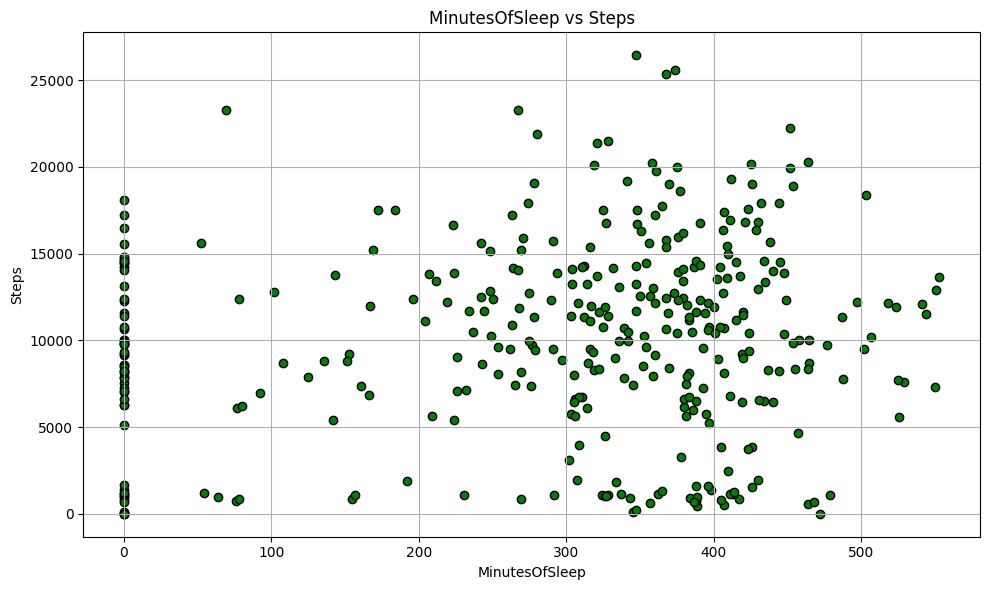

In [39]:
# your answer here
# Plotting
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'], color='green', edgecolor='black')  # Plotting the scatter plot

# Additional plot details
plt.title('MinutesOfSleep vs Steps')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.grid(True)  # Adding a grid for better readability
plt.tight_layout()  # Adjust the plotting area

plt.show()  # Display the plot

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [43]:
# your answer here
columns= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
subset = fitbit[columns]  # Using 'column' as provided in your message

# Compute the correlation matrix
cor_fit = subset.corr()

print(cor_fit)

                     Calorie burned     Steps    Floors  Minutes Sedentary   
Calorie burned             1.000000  0.255305  0.130757           0.125353  \
Steps                      0.255305  1.000000  0.306511           0.076906   
Floors                     0.130757  0.306511  1.000000           0.057812   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   

                     Minutes Very Active  MinutesOfSleep  
Calorie burned                  0.197881        0.011485  
Steps                           0.571452        0.130986  
Floors                          0.399503        0.069464  
Minutes Sedentary               0.105963        0.204242  
Minutes Very Active             1.000000        0.108018  
MinutesOfSleep                  0.108018        1.000000  


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [ ]:
# your answer here


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [ ]:
# your answer here


#### Show visually the frequency distribution of the time_grades dataset.

In [ ]:
# your answer here


#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [ ]:
# your answer here


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [ ]:
# your answer here


#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
